In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [339]:
df = pd.read_csv("games.csv")

# O ficheiro contêm uma lista de jogos da loja Steam, incluindo o Metacritic score, preço e número de recomendações

In [340]:
df.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12624 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12624 non-null  int64  
 3   RecommendationCount          12624 non-null  int64  
 4   IsFree                       12624 non-null  bool   
 5   GenreIsNonGame               12624 non-null  bool   
 6   GenreIsIndie                 12624 non-null  bool   
 7   GenreIsAction                12624 non-null  bool   
 8   GenreIsAdventure             12624 non-null  bool   
 9   GenreIsCasual                12624 non-null  bool   
 10  GenreIsStrategy              12624 non-null  bool   
 11  GenreIsRPG                   12624 non-null  bool   
 12  GenreIsSimulation            12624 non-null  bool   
 13  GenreIsEarlyAcce

Corrigir isto das linhas que tem isFree a true e o genreisfreetoplay a false

In [342]:
#compare column isFree with genreIsFreeToPlay column
df[df['IsFree'] != df['GenreIsFreeToPlay']]

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
12,Half-Life: Source,Jun 1 2004,0,2547,True,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
15,Half-Life 2: Lost Coast,Oct 27 2005,0,4352,True,False,False,True,False,False,False,False,False,False,False,False,False,False,0.00
16,Half-Life Deathmatch: Source,May 1 2006,0,864,True,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
25,Alien Swarm,Jul 19 2010,77,14625,True,False,False,True,False,False,False,False,False,False,False,False,False,False,0.00
46,Source Filmmaker,Jul 10 2012,0,10079,True,True,False,False,False,False,False,False,False,False,False,False,False,False,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12530,The Secret of Pineview Forest,Oct 31 2016,0,0,True,False,True,True,True,False,False,False,False,False,False,False,False,False,0.00
12553,ShotForge,Nov 2 2016,0,0,True,False,True,False,False,False,False,False,True,False,False,False,False,False,0.00
12557,bobs game (puzzle game) from bobs game,Oct 28 2016,0,0,True,False,True,True,False,True,False,False,False,True,False,False,False,False,0.00
12587,VRCapture,Oct 31 2016,0,0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,0.00


In [343]:
df.describe()

,Metacritic,RecommendationCount,PriceInitial
count,12624.000000,1.262400e+04,12624.000000
mean,12.955640,1.245043e+03,9.290024
std,28.094054,1.560722e+04,14.164946
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,1.990000
50%,0.000000,0.000000e+00,5.990000
75%,0.000000,2.692500e+02,9.990000
max,96.000000,1.427633e+06,449.990000


In [344]:
df.isna().any()

ResponseName                   False
ReleaseDate                     True
Metacritic                     False
RecommendationCount            False
IsFree                         False
GenreIsNonGame                 False
GenreIsIndie                   False
GenreIsAction                  False
GenreIsAdventure               False
GenreIsCasual                  False
GenreIsStrategy                False
GenreIsRPG                     False
GenreIsSimulation              False
GenreIsEarlyAccess             False
GenreIsFreeToPlay              False
GenreIsSports                  False
GenreIsRacing                  False
GenreIsMassivelyMultiplayer    False
PriceInitial                   False
dtype: bool

<AxesSubplot: >

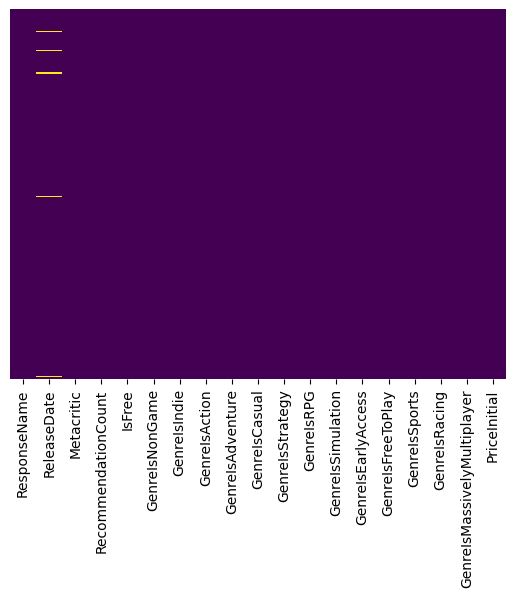

In [345]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [346]:
df["ReleaseDate"].isna().sum()

86

In [347]:
df[df['ReleaseDate'].isnull()]

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
262,Strong Bads Cool Game for Attractive People: E...,NaN,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.00
263,Strong Bads Cool Game for Attractive People: E...,NaN,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.00
264,Strong Bads Cool Game for Attractive People: E...,NaN,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.00
265,Strong Bads Cool Game for Attractive People: E...,NaN,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.00
337,Sherlock Holmes: The Mystery of the Persian Ca...,NaN,0,0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12178,Draconic Order VR,NaN,0,0,False,False,True,False,True,False,False,True,False,True,False,False,False,False,0.00
12213,DYSTORIA,NaN,0,0,False,False,True,True,False,False,False,False,False,True,False,False,False,False,0.00
12546,Blade & Bones,NaN,0,0,False,False,False,True,True,False,False,True,False,False,False,False,False,False,0.00
12550,Overkill VR,NaN,0,0,False,False,False,True,False,False,False,False,True,True,False,False,False,False,0.00


Vamos eliminar os missing values

Missing values em ReleaseDate

In [348]:
df[df.duplicated()]

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
8,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
26,Portal 2,Apr 18 2011,95,73128,False,False,False,True,True,False,False,False,False,False,False,False,False,False,19.99
32,SiN Episodes: Emergence,May 10 2006,75,385,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
33,SiN Episodes: Emergence,May 10 2006,75,385,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
50,Dark Messiah of Might & Magic,Oct 25 2006,72,2776,False,False,False,True,False,False,False,True,False,False,False,False,False,False,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,Maya LT (with Stingray),Apr 22 2014,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,30.00
8101,Krosmaster Arena,Nov 9 2015,0,234,True,False,False,False,False,False,True,False,False,False,True,False,False,False,0.00
10288,Tom Clancys Rainbow Six(r) Siege,Dec 1 2015,0,31397,False,False,False,True,False,False,False,False,False,False,False,False,False,False,49.99
10289,Tom Clancys Rainbow Six(r) Siege,Dec 1 2015,0,31397,False,False,False,True,False,False,False,False,False,False,False,False,False,False,49.99


In [349]:
df.duplicated().sum()

114

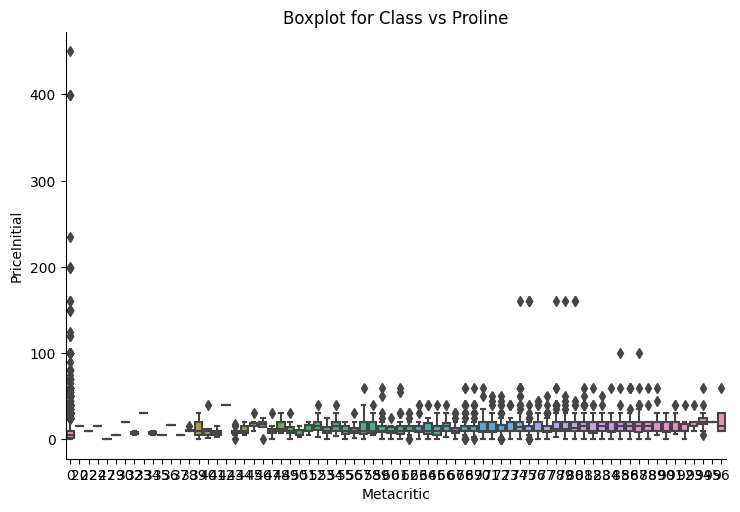

In [350]:
sns.catplot(x="Metacritic", y="PriceInitial", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Class vs Proline")
plt.show()

# Outliers

In [351]:
df[ df["PriceInitial"] > 449]

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
4030,SolidFace Parametric CAD Modeler 2D/3D,Dec 22 2014,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,449.99


# Missing values na coluna ReleaseDate

In [352]:
#remove missing values
df = df.dropna()

Linhas duplicadas removidas

In [353]:
df.drop_duplicates(inplace=True)

In [354]:
#tranform true/false to 1/0
df['IsFree'] = df['IsFree'].astype(int)
df['GenreIsNonGame'] = df['GenreIsNonGame'].astype(int)
df['GenreIsIndie'] = df['GenreIsIndie'].astype(int)
df['GenreIsAction'] = df['GenreIsAction'].astype(int)
df['GenreIsAdventure'] = df['GenreIsAdventure'].astype(int)
df['GenreIsCasual'] = df['GenreIsCasual'].astype(int)
df['GenreIsStrategy'] = df['GenreIsStrategy'].astype(int)
df['GenreIsRPG'] = df['GenreIsRPG'].astype(int)
df['GenreIsSimulation'] = df['GenreIsSimulation'].astype(int)
df['GenreIsEarlyAccess'] = df['GenreIsEarlyAccess'].astype(int)
df['GenreIsFreeToPlay'] = df['GenreIsFreeToPlay'].astype(int)
df['GenreIsSports'] = df['GenreIsSports'].astype(int)
df['GenreIsRacing'] = df['GenreIsRacing'].astype(int)
df['GenreIsMassivelyMultiplayer'] = df['GenreIsMassivelyMultiplayer'].astype(int)

In [355]:
df.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99
2,Day of Defeat,May 1 2003,79,2319,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99


In [356]:
df.drop("ResponseName",axis=1, inplace=True)
df.head()

,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Nov 1 2000,88,68991,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9.99
1,Apr 1 1999,0,2439,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99
2,May 1 2003,79,2319,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99
3,Jun 1 2001,0,888,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99
4,Nov 1 1999,0,2934,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99


<AxesSubplot: >

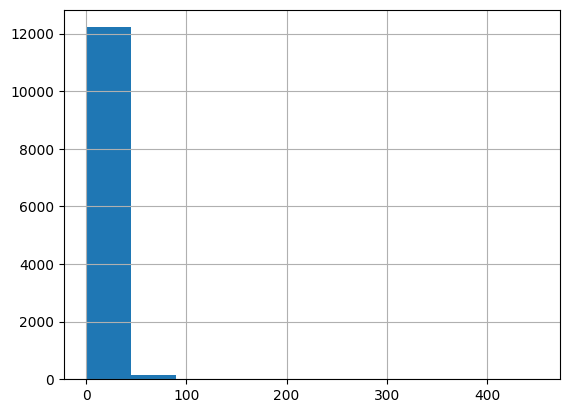

In [357]:
#histogram of price column
df['PriceInitial'].hist()

In [358]:
df['PriceInitial'].describe()

count    12424.000000
mean         9.254713
std         14.176651
min          0.000000
25%          1.990000
50%          5.990000
75%          9.990000
max        449.990000
Name: PriceInitial, dtype: float64

In [359]:
df[df['PriceInitial'] > 50].count()

ReleaseDate                    127
Metacritic                     127
RecommendationCount            127
IsFree                         127
GenreIsNonGame                 127
GenreIsIndie                   127
GenreIsAction                  127
GenreIsAdventure               127
GenreIsCasual                  127
GenreIsStrategy                127
GenreIsRPG                     127
GenreIsSimulation              127
GenreIsEarlyAccess             127
GenreIsFreeToPlay              127
GenreIsSports                  127
GenreIsRacing                  127
GenreIsMassivelyMultiplayer    127
PriceInitial                   127
dtype: int64

<AxesSubplot: xlabel='PriceInitial'>

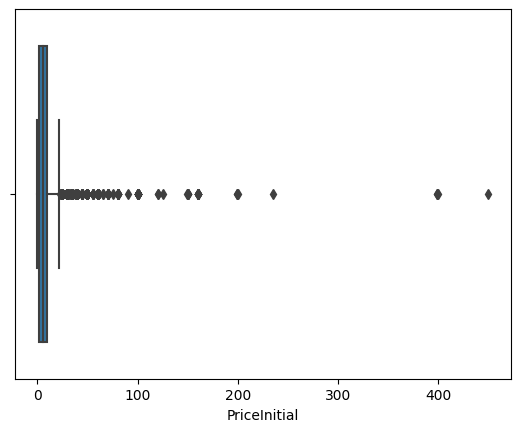

In [360]:
# boxplot of price column
sns.boxplot(x=df['PriceInitial'])

<AxesSubplot: xlabel='PriceInitial'>

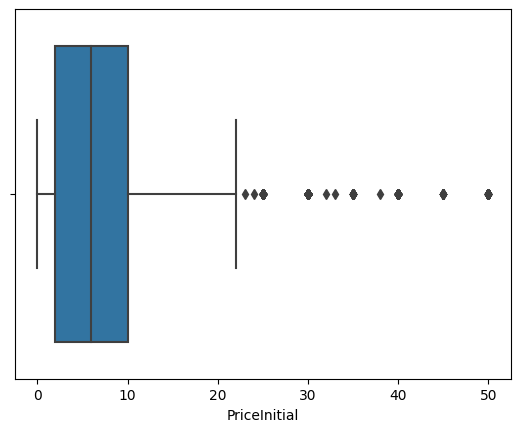

In [361]:
df.drop(df[df['PriceInitial'] > 50].index, inplace=True)
sns.boxplot(x=df['PriceInitial'])

<AxesSubplot: xlabel='PriceInitial'>

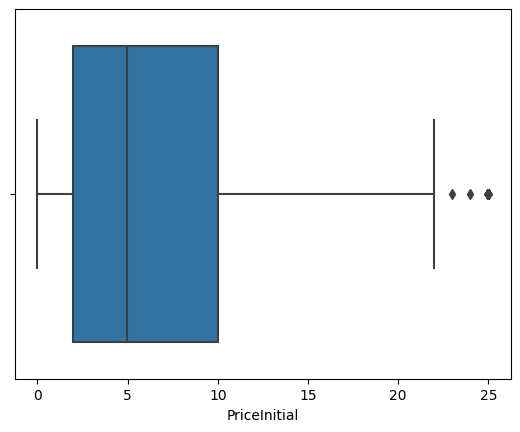

In [362]:
df.drop(df[df['PriceInitial'] > 25].index, inplace=True)
sns.boxplot(x=df['PriceInitial'])

<AxesSubplot: xlabel='PriceInitial'>

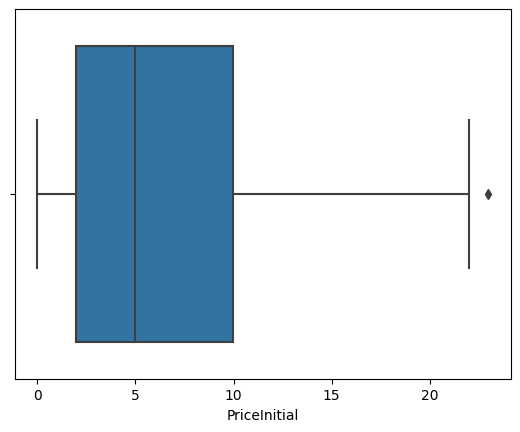

In [363]:
df.drop(df[df['PriceInitial'] > 23].index, inplace=True)
sns.boxplot(x=df['PriceInitial'])

In [364]:
df[df['PriceInitial']> 20]

,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
2066,Jan 16 2013,79,68021,0,0,1,0,0,0,0,0,1,0,0,0,0,0,22.99
2369,Aug 1 2013,0,890,0,0,0,0,0,0,0,0,1,1,0,0,0,0,21.99
4480,Aug 20 2015,0,3051,0,0,1,1,1,0,0,0,0,0,0,0,0,0,21.99
6778,Apr 14 2016,84,1840,0,0,0,0,0,0,0,1,0,0,0,0,0,0,20.99


<AxesSubplot: xlabel='PriceInitial'>

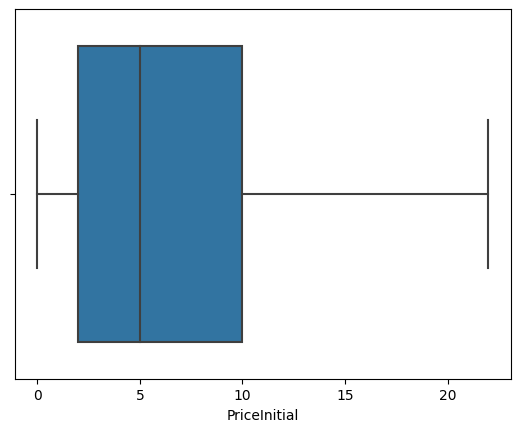

In [365]:
df.drop(df[df['PriceInitial'] > 22].index, inplace=True)
sns.boxplot(x=df['PriceInitial'])

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11660 entries, 0 to 12623
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ReleaseDate                  11660 non-null  object 
 1   Metacritic                   11660 non-null  int64  
 2   RecommendationCount          11660 non-null  int64  
 3   IsFree                       11660 non-null  int64  
 4   GenreIsNonGame               11660 non-null  int64  
 5   GenreIsIndie                 11660 non-null  int64  
 6   GenreIsAction                11660 non-null  int64  
 7   GenreIsAdventure             11660 non-null  int64  
 8   GenreIsCasual                11660 non-null  int64  
 9   GenreIsStrategy              11660 non-null  int64  
 10  GenreIsRPG                   11660 non-null  int64  
 11  GenreIsSimulation            11660 non-null  int64  
 12  GenreIsEarlyAccess           11660 non-null  int64  
 13  GenreIsFreeToPla

In [367]:
df.head()

,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Nov 1 2000,88,68991,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9.99
1,Apr 1 1999,0,2439,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99
2,May 1 2003,79,2319,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99
3,Jun 1 2001,0,888,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99
4,Nov 1 1999,0,2934,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.99


In [368]:
# get datetime from object
import re
import datetime
data_t = df.copy()
def get_datetime(x):
    print(x)
    lista = x.split(" ")
    length = len(lista)
    #check if date has hifen
    if "-" in lista and len(lista) != 1:
        length = len(lista)-1
        #remove hifen
        lista.remove("-")
    if length > 4:
        return None
    elif length == 4:
        mes,ano,mes2,ano2 = lista
        if mes == "Summer":
            #mid summer
            return datetime.date(int(ano),7,15)
        if mes2 == 'Q1':
            #meio do q1
            return datetime.date(int(ano2), 2, 15)
        if mes2 == 'Early':
            #inicio do ano
            return datetime.date(int(ano2), 3, 15)
    elif length == 3:
        mes,dia,ano = lista
        #check if its ordinal with regex
        if re.search(r'[0-9](?:st|nd|rd|th)', dia):
            dia = dia[:-2]
        if mes == "Coming":
            if re.search(r'^[12][0-9]{3}$', ano):
                return datetime.date(int(ano),6,15)
            else:
                return None
        if mes == "November":
            return datetime.date(int(ano),11,int(dia))
        if mes == "Late" and dia == "Summer":
            return datetime.date(int(ano),9,15)
        if mes == 'Jan':
            return datetime.date(int(ano),1,int(dia))
        elif mes == 'Feb':
            return datetime.date(int(ano),2,int(dia))
        elif mes == 'Mar':
            return datetime.date(int(ano),3,int(dia))
        elif mes == 'Apr':
            return datetime.date(int(ano),4,int(dia))
        elif mes == 'May':
            return datetime.date(int(ano),5,int(dia))
        elif mes == 'Jun':
            return datetime.date(int(ano),6,int(dia))
        elif mes == 'Jul':
            return datetime.date(int(ano),7,int(dia))
        elif mes == 'Aug':
            return datetime.date(int(ano),8,int(dia))
        elif mes == 'Sep':
            return datetime.date(int(ano),9,int(dia))
        elif mes == 'Oct':
            return datetime.date(int(ano),10,int(dia))
        elif mes == 'Nov':
            return datetime.date(int(ano),11,int(dia))
        elif mes == 'Dec':
            return datetime.date(int(ano),12,int(dia))
    elif length == 2:
        mes,ano = lista
        #check if its a valid year
        if re.search(r'^[12][0-9]{3}$', ano):
            if mes == 'Coming':
                #delete this row
                return None
            elif mes == 'Q1':
                #arredondamento ao meio
                return datetime.date(int(ano),2,15)
            elif mes == 'Q2':
                #arredondamento ao meio
                return datetime.date(int(ano),5,15)
            elif mes == 'Janurary':
                return datetime.date(int(ano),1,15)
            elif mes == 'February':
                return datetime.date(int(ano),2,15)
            elif mes == 'March':
                return datetime.date(int(ano),3,15)
            elif mes == 'April':
                return datetime.date(int(ano),4,15)
            elif mes == 'Apr':
                return datetime.date(int(ano),9,15)
            elif mes == 'May':
                return datetime.date(int(ano),5,15)
            elif mes == 'June':
                return datetime.date(int(ano),6,15)
            elif mes == 'July':
                return datetime.date(int(ano),7,15)
            elif mes == 'August':
                return datetime.date(int(ano),8,15)
            elif mes == 'September':
                return datetime.date(int(ano),9,15)
            elif mes == 'Sept':
                return datetime.date(int(ano),9,15)
            elif mes == 'October':
                return datetime.date(int(ano),10,15)
            elif mes == 'November':
                return datetime.date(int(ano),11,15)
            elif mes == 'December':
                return datetime.date(int(ano),12,15)
        else:
            return None
    elif length == 1:
        ano = x
        #check if its a valid year
        if ano == 'TBA':
                #delete this row
                return None
        elif ano == 'TBD':
                #delete this row
                return None
        elif re.search(r'^[12][0-9]{3}$', ano):
                #consideramos meio do ano
                #check if its valid year
                try:
                    return datetime.date(int(ano),6,15)
                except ValueError:
                    #delete this row
                    return None
        elif "-" in lista:
            dia,ano = x.split("-")
            #meio do ano
            return datetime.date(int(ano),6,15)



data_t['ReleaseDate'] = pd.to_datetime(data_t['ReleaseDate'].apply(get_datetime)) 
#print column release date
data_t['ReleaseDate']


Nov 1 2000
Apr 1 1999
May 1 2003
Jun 1 2001
Nov 1 1999
Nov 1 2000
Nov 8 1998
Mar 1 2004
Jun 1 2001
Nov 16 2004
Nov 1 2004
Jun 1 2004
Jul 12 2010
Nov 1 2004
Oct 27 2005
May 1 2006
Jun 1 2006
Oct 10 2007
Oct 10 2007
Oct 10 2007
Nov 17 2008
Nov 16 2009
Jul 9 2013
Apr 18 2011
Jul 19 2010
Aug 21 2012
Oct 12 2005
Mar 14 2006
May 14 2009
May 10 2006
Jul 14 2005
Aug 23 2006
Sep 29 2006
Sep 19 2008
Feb 7 2006
Feb 7 2006
Jul 6 2006
Jul 6 2006
Jul 6 2006
Jul 26 2006
Oct 16 2006
Apr 3 2007
Jul 10 2012
Apr 1 2006
Apr 30 2009
Oct 25 2006
Aug 3 2007
Aug 4 2011
Aug 3 2007
Aug 3 2007
Aug 3 2007
Aug 3 2007
Aug 3 2007
Aug 3 2007
Aug 3 2007
Aug 3 2007
Aug 3 2007
Aug 3 2007
Aug 3 2007
Aug 3 2007
Jul 11 2006
Nov 20 2006
Oct 29 2010
May 8 2006
Dec 19 2006
Jun 1 2007
Jun 29 2007
Nov 7 2007
Mar 22 2007
Oct 13 2006
Oct 13 2006
Oct 13 2006
Oct 13 2006
Mar 12 2008
Mar 12 2008
Jul 12 2007
Mar 12 2008
Jul 21 2006
Jul 21 2006
Oct 16 2008
Oct 8 2010
Oct 8 2010
Oct 26 2006
Oct 26 2006
Oct 26 2006
Dec 21 2006
Aug 24 20

0       2000-11-01
1       1999-04-01
2       2003-05-01
3       2001-06-01
4       1999-11-01
           ...    
12618   2016-10-31
12619   2016-10-26
12621   2016-10-26
12622   2016-10-27
12623   2016-11-02
Name: ReleaseDate, Length: 11660, dtype: datetime64[ns]

In [373]:
#number of none values
data_t['ReleaseDate'].isnull().sum()
#drop none values
data_t = data_t.dropna(subset=['ReleaseDate'])

In [371]:
data_t.info()
#save csv file
data_t.to_csv('data_t.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11340 entries, 0 to 12623
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ReleaseDate                  11340 non-null  datetime64[ns]
 1   Metacritic                   11340 non-null  int64         
 2   RecommendationCount          11340 non-null  int64         
 3   IsFree                       11340 non-null  int64         
 4   GenreIsNonGame               11340 non-null  int64         
 5   GenreIsIndie                 11340 non-null  int64         
 6   GenreIsAction                11340 non-null  int64         
 7   GenreIsAdventure             11340 non-null  int64         
 8   GenreIsCasual                11340 non-null  int64         
 9   GenreIsStrategy              11340 non-null  int64         
 10  GenreIsRPG                   11340 non-null  int64         
 11  GenreIsSimulation            11340 non-nu